# Urban Sound Classification — Part 2: sample rate conversion, Librosa <br>
https://towardsdatascience.com/urban-sound-classification-part-2-sample-rate-conversion-librosa-ba7bc88f209a <hr>

from last part you might see that the sound file might have different sampling rates, bit depth and number of channel bla bla so in this chapter we will extract this information from each sound file and see how the distribution look like

In [13]:
import pandas as pd
import numpy as np
import os
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

from IPython.core.display import HTML
from scipy.io import wavfile as wav

## Sound Data Format Investigation

there are not only sampled sound data but also all the information about the data format are attach with wave file

In [4]:
ipd.Image(url= "https://miro.medium.com/max/1400/1*2UHT9cXTtZqPtXrNM8Gx1A.png")

in addition to path_class which return the full path name from each file name now we will add more function wav_fmt_parser which extract three types of information needed from each WAVE file, number of channels, sr and bit depth

In [6]:
data = pd.read_csv('D:/project/method explore/data/urbansound8k/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
appended = []
appended = [data[data.fold == i]['class'].value_counts() for i in range(1, 11)]

class_dist = pd.DataFrame(appended)
class_dist = class_dist.reset_index()
class_dist['index'] = ["fold" + str(x) for x in range(1, 11)]
class_dist

,index,jackhammer,air_conditioner,children_playing,dog_bark,drilling,street_music,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [5]:
# function to get full path name of WAV file and its label
def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('D:/project/method explore/data/urbansound8k', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

# function to extract three types of information needed
def wav_fmt_parser(file_name):
    full_path, _ = path_class(file_name)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    n_channels_string = riff_fmt[22:24]
    n_channels = struct.unpack("H",n_channels_string)[0]
    s_rate_string = riff_fmt[24:28]
    s_rate = struct.unpack("I",s_rate_string)[0]
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    return (n_channels,s_rate,bit_depth)

# function to plot the waveform
def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

phewww the code below might take a long time so make sure you have something to do while you wating for this parser that pass into the data frame but no longer than five minute for me

In [9]:
wav_fmt_data = [wav_fmt_parser(i) for i in data.slice_file_name]
data[['n_channels', 'sampling_rate', 'bit_depth']] = pd.DataFrame(wav_fmt_data)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,n_channels,sampling_rate,bit_depth
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,2,44100,16
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,2,44100,16
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,2,44100,16
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,2,44100,16
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,2,44100,16


In [10]:
# how sampling rate goes
data.sampling_rate.value_counts()

44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: sampling_rate, dtype: int64

In [11]:
# how channels goes
data.n_channels.value_counts() # 1 mean mono, 2 mean sterio

2    7993
1     739
Name: n_channels, dtype: int64

In [12]:
# bit depth
data.bit_depth.value_counts()

16    5758
24    2753
32     169
8       43
4        9
Name: bit_depth, dtype: int64

### CHEATING ALERT !!! LIBROSA !!!

In [14]:
data[data.slice_file_name == '100652-3-0-1.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class,n_channels,sampling_rate,bit_depth
15,100652-3-0-1.wav,100652,0.5,4.5,1,2,3,dog_bark,2,44100,16


In [17]:
fullpath,_ = path_class('100652-3-0-1.wav')
librosa_load, librosa_sampling_rate = librosa.load(fullpath)
scipy_sampling_rate, scipy_load = wav.read(fullpath)
print('original sample rate:', scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

original sample rate: 44100
converted sample rate: 22050


original wav file min~max range: -30926 ~ 30119
converted wav file min~max range: -0.7296108 ~ 0.74331266


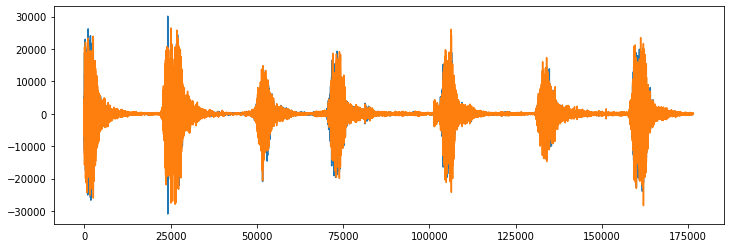

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_load)

Look above it still sterio which have two channels orange for the channel, and blue for the other.

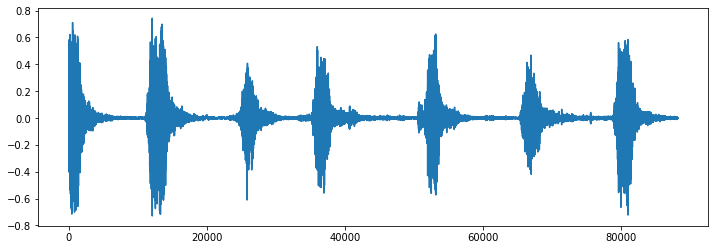

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_load)

and this here librosa is reduce to mono